#  Gradient boosting
Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. I makes use of weak learner
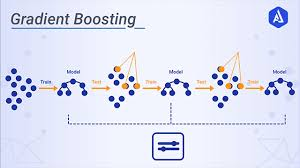
* A weak hypothesis or weak learner is defined as one whose performance is at least slightly better than random chance.
* The idea is to use the weak learning method several times to get a succession of hypotheses, each one refocused on the examples that the previous ones found difficult and misclassified. … Note, however, it is not obvious at all how this can be done

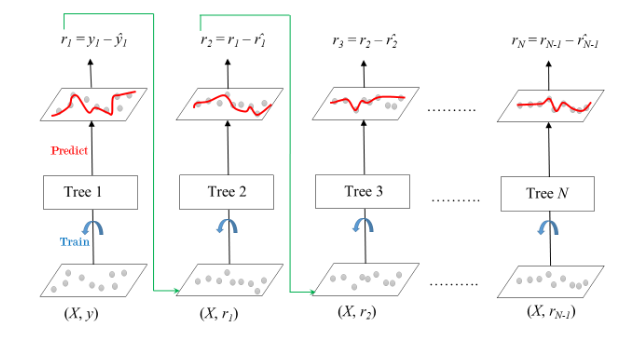


# Some Advantages of Gradient Boosting

* Slower to train than Random Forest (I using 'old' Gradient Boosting Regression) it is mush faster to predict

* Very fast using XGBoost, LightGBM, Pygbm , new scikit-learn 

* Small model size

* More accurate than Random Forests

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'

np.set_printoptions(precision = 3)
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler

# Using the Iris Datasets

In [78]:
from sklearn.datasets import load_iris
iris = load_iris()

In [79]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

In [80]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, stratify = iris.target, random_state=0, test_size=0.3)

In [81]:
gd_model = GradientBoostingClassifier(n_estimators=30)
gd_model.fit(X_train, y_train)
print('Accuracy is:',gd_model.score(X_test, y_test))

Accuracy is: 0.9777777777777777


 # Illustration using the synthetic moon data

In [30]:
from sklearn.datasets import make_moons
X, y = make_moons(noise = .2, random_state =1)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0, test_size =0.3)

gb_model2 = GradientBoostingClassifier(n_estimators=10, max_depth=2, learning_rate=.2).fit(X_train, y_train)
print('Accuracy:',gb_model2.score(X_test, y_test))


Accuracy: 1.0


# Note: 
Turning our parameters also increases the accuracy of our model

# Visualization using Gridsearch

In [42]:
#lets create a grid for plotting decision functions
x_lin = np.linspace(X_train[:, 0].min() - .5, X_train[:, 0].max() + .5, 100)
y_lin = np.linspace(X_train[:, 1].min() - .5, X_train[:, 1].max() + .5, 100)
x_grid, y_grid = np.meshgrid(x_lin, y_lin)
X_grid = np.c_[x_grid.ravel(), y_grid.ravel()]

probs = list(gb_model2.staged_predict_proba(X_grid))


#probs = list(gb_model2.staged_predict_proba(x_grid))

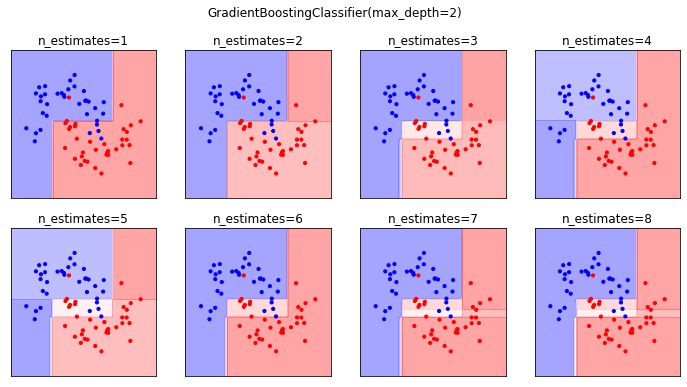

In [44]:
fig, axes = plt.subplots(2,4,subplot_kw ={'xticks': (()), 'yticks': (())}, figsize = (12,6) )

for i, (prob, ax) in enumerate(zip(probs, axes.ravel())):
    ax.set_title('n_estimates={}'.format(i+1))
    ax.contourf(x_grid, y_grid, prob[:, 1].reshape(x_grid.shape), alpha=.4, cmap ='bwr')
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', s=10)
    
fig.suptitle('GradientBoostingClassifier(max_depth=2)')
plt.savefig('grad_boost_depth2.png')

In [45]:
from sklearn.model_selection import GridSearchCV

param_grid = {'learning_rate': [.2, .1, .05, .02, .01, .001]}
grid = GridSearchCV(GradientBoostingClassifier(),
                    param_grid=param_grid, cv=10,
                    return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.2, 0.1, 0.05, 0.02, 0.01, 0.001]},
             return_train_score=True)

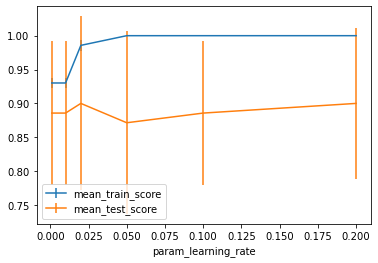

In [47]:
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_learning_rate', y='mean_train_score', yerr='std_train_score', ax=plt.gca())
scores.plot(x='param_learning_rate', y='mean_test_score', yerr='std_test_score', ax=plt.gca())

# Using the Boston dataset

In [95]:
from sklearn.datasets import load_boston
from sklearn.ensemble import GradientBoostingRegressor
boston = load_boston()
X_train, X_test,  y_train, y_test = train_test_split(boston.data, boston.target, test_size=.3, random_state=0)

gb_model3 = GradientBoostingRegressor(n_estimators=30).fit(X_train, y_train)


In [96]:
print('Accuracy', gb_model3.score(X_test, y_test))

Accuracy 0.81487194076002


# visualization

In [90]:
param_grid = {'learning_rate': [.5, .2, .1, .05, .02, .01, .001]}
grid =  GridSearchCV(GradientBoostingRegressor(), param_grid=param_grid, cv=10,
                    return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.5, 0.2, 0.1, 0.05, 0.02, 0.01,
                                           0.001]},
             return_train_score=True)

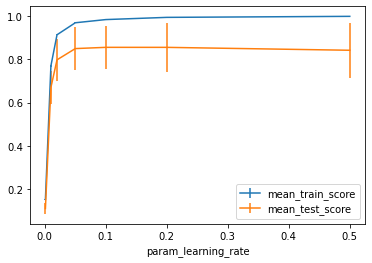

In [98]:
scores =  pd.DataFrame(grid.cv_results_)
scores.plot(x='param_learning_rate', y='mean_train_score', yerr = 'std_train_score', ax= plt.gca())
scores.plot(x='param_learning_rate', y='mean_test_score', yerr = 'std_test_score', ax= plt.gca())
plt.show()

In [100]:
grid.best_params_, grid.best_score_

({'learning_rate': 0.1}, 0.856236651173002)